# `numpy` practice

In [1]:
import numpy as np

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

___1.Do numpy exercises 6, 8, 9 and 19.___

In [2]:
#numpy exercises 6
#Create a null vector of size 10 but the fifth value which is 1

(np.arange(10) == 4) * 1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [3]:
#numpy exercises 8
#Reverse a vector (first element becomes last) 

a = np.array([3,5,6,7])
a[::-1]
#or np.array([3,5,6,7])[::-1]

array([7, 6, 5, 3])

In [4]:
#numpy exercises 8
#Create a 3x3 matrix with values ranging from 0 to 8
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
#numpy exercises 19
#Create a 8x8 matrix and fill it with a checkerboard pattern

np.array(([1,0]*4+[0,1]*4)*4).reshape((8,8))

#not very good solution
#x = (np.arange(8) % 2 == 0) * 1
#((x + x[:, None]) % 2 == 0) * 1

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

___2. numpy exercise 44.___  
Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

In [6]:
rand = np.random.random((10,2))
x = rand[:,0]
y = rand[:,1]
#define r and phi
res = np.array((np.sqrt(x**2+y**2), np.arctan2(y,x))).T
print('cartesian coordinates: ', rand, sep = '\n')
print('polar coordinates: ', '  r           phi', res, sep = '\n')

cartesian coordinates: 
[[0.03378497 0.4058825 ]
 [0.60476157 0.82840476]
 [0.82535634 0.34245715]
 [0.17620802 0.81595424]
 [0.84615801 0.2370541 ]
 [0.75269397 0.3066167 ]
 [0.44717652 0.95543863]
 [0.48024354 0.01748752]
 [0.87108496 0.41516376]
 [0.36811089 0.53290869]]
polar coordinates: 
  r           phi
[[0.40728617 1.48774948]
 [1.02566613 0.94019802]
 [0.89358267 0.39330223]
 [0.83476379 1.35810916]
 [0.8787366  0.27315101]
 [0.81274967 0.38683425]
 [1.05490749 1.13304802]
 [0.48056183 0.03639778]
 [0.96496111 0.44475736]
 [0.64768611 0.96630008]]


___3. Snail curve___    
A snail curve is defined by the following equation in polar coordinates:  $r = a + \cos\phi$. Plot the curve on an $x$-$y$  plane for several values of  𝑎 . (Hint: np.linspace creates a linearly spaced array of values)

In [7]:
import matplotlib.pyplot as plt

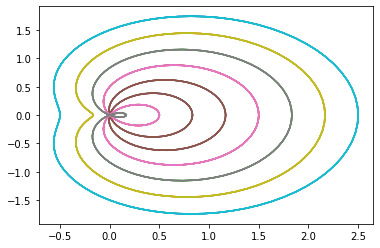

In [8]:
phi = np.linspace(-2*np.pi, 2*np.pi, 201)
phi = phi[phi != 0]
    
values = np.linspace(-1.5, 1.5, 10)
for a in values:
    r = a + np.cos(phi)
    x, y = r * np.cos(phi), r * np.sin(phi)
    plt.plot(x, y)
plt.show()

__4. Cochleoid curve__  
A cochleoid curve is defined by the following equation in polar coordinates:  $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane.(This time, use np.where to work around division by zero).

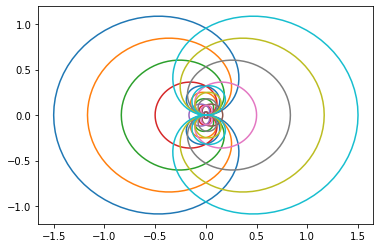

In [9]:
phi = np.linspace(-2*np.pi, 2*np.pi, 201)
phi = np.where(phi != 0, phi, 1)

values = np.linspace(-1.5, 1.5, 10)
for a in values:
    r = a * np.sin(phi) / phi
    x, y = r * np.cos(phi), r * np.sin(phi)
    plt.plot(x, y)
plt.show()

__5. Cauchy matrix__  
Given two arrays, u and v, construct the Cauchy matrix using 1) explicit broadcasting, and 2) subtract.outer attribute.

In [10]:
#1) explicit broadcasting
np.set_printoptions(precision=3)
u = np.arange(4)
v = u + 0.5

cauchy = 1/(u[:, None] - v)
print(cauchy)

[[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


In [11]:
#2) subtract.outer attribute.
np.set_printoptions(precision=3)
u = np.arange(4)
v = u + 0.5


cauchy = 1/np.subtract.outer(u,v)
print(cauchy)

[[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


__6.Monte Carlo Error propagation__   
See "Monte Carlo Error propagation" (separate html)

In [12]:
#example from html 
M1_m = 40e4
M1_s = 500
M2_m = 30e4
M2_s = 1000
r_m = 3.2
r_s = .01
G = 6.67384e-11

In [13]:
F_m = G * M1_m * M2_m / r_m ** 2
F_s = np.sqrt(((G * M2_m / r_m ** 2)**2 * M1_s**2 + (G * M1_m / r_m ** 2)**2 * M2_s**2 + (-2 * G * M1_m * M2_m / r_m ** 3)**2 * r_s**2))
print('F =', F_m, '±', F_s)

F = 0.7820906249999999 ± 0.005625407272639265


___Monte-Carlo 1___

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm

F = 0.7821109286257307 ± 0.0056227542143534705


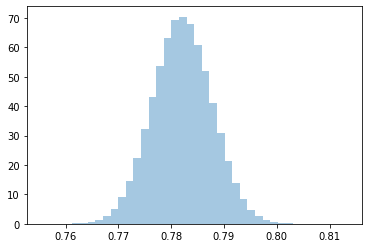

In [15]:
M1 = np.random.normal(M1_m, M1_s, size=1000000)
M2 = np.random.normal(M2_m, M2_s, size=1000000)
r = np.random.normal(r_m, r_s, size=1000000)

F = G * M1 * M2 / r**2
print('F =', F.mean(), '±', F.std())

#plot the normalized histogram
plt.hist(F, bins=40, alpha=0.4, density = True)
plt.show()

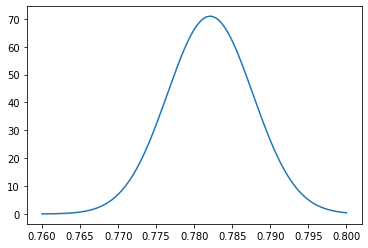

In [16]:
#Gaussian function
x = np.arange(0.76, 0.8, 0.0001)
plt.plot(x, 1/(np.sqrt(2*np.pi)*F_s)*np.exp(-np.power((x - F_m)/F_s, 2)/2))

___Monte-Carlo 2___

In [17]:
M1_m = 40e4
M1_s = 2e4
M2_m = 30e4
M2_s = 1e5
r_m = 3.2
r_s = 1
G = 6.67384e-11
F_m = G * M1_m * M2_m / r_m ** 2
F_s = np.sqrt(((G * M2_m / r_m ** 2)**2 * M1_s**2 + (G * M1_m / r_m ** 2)**2 * M2_s**2 + (-2 * G * M1_m * M2_m / r_m ** 3)**2 * r_s**2))
print('F =', F_m, '±', F_s)

F = 0.7820906249999999 ± 0.5553593043410235


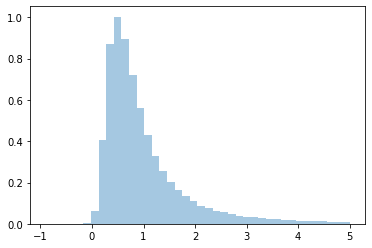

In [18]:
np.random.seed(1234)
M1 = np.random.normal(M1_m, M1_s, size=1000000)
M2 = np.random.normal(M2_m, M2_s, size=1000000)
r = np.random.normal(r_m, r_s, size=1000000)

F = G * M1 * M2 / r**2

#plot the normalized histogram
plt.hist(F[(F<5) & (F>-1)], bins=40, alpha=0.4, density = True)
plt.show()

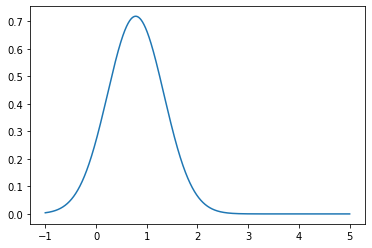

In [19]:
#Gaussian function
x = np.arange(-1.0, 5, 0.0001)
plt.plot(x, 1/(np.sqrt(2*np.pi)*F_s)*np.exp(-np.power((x - F_m)/F_s, 2)/2))